<a href="https://colab.research.google.com/github/NhatCaoVan/Traffic-Signs-Category-Classification/blob/main/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd/content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [ ]:
pwd

'/content/drive/MyDrive/ML'

In [ ]:
ls

Model1.h5  Model1.ipynb  test.p  traffic-signs-data.zip  train.p  valid.p


In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"


In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=2abe1ec262531d25fdea0daf80bac873f37815f2a7ca413ab255be3e5a6a8f60
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget

In [ ]:
wget.download(link)

'traffic-signs-data (1).zip'

In [ ]:
data = "./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [ ]:
import pickle

In [ ]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [ ]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [ ]:
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
trainX = train["features"]
trainY = train["labels"]

In [ ]:
trainX.shape

(34799, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt


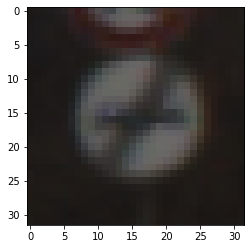

In [ ]:
plt.imshow(trainX[2])

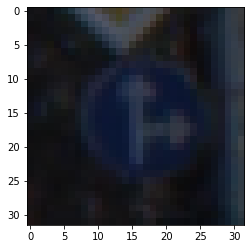

In [ ]:
plt.imshow(trainX[1000])

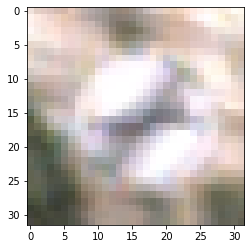

In [ ]:
plt.imshow(trainX[40])

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [ ]:
classNames[trainY[50]]

'End of no passing'

In [ ]:
from sklearn.utils import shuffle

In [ ]:
trainX, trainY = shuffle(trainX, trainY)

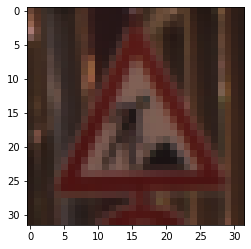

In [ ]:
plt.imshow(trainX[1])

In [ ]:
classNames[trainY[1]]

'Turn left ahead'

In [ ]:
validX = valid["features"]
validY = valid["labels"]

In [ ]:
testX = test["features"]
testY = test["labels"]

In [ ]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [ ]:
trainX[5]

array([[[0.17647059, 0.24705882, 0.35686275],
        [0.22745098, 0.25490196, 0.35686275],
        [0.27058824, 0.28235294, 0.3372549 ],
        ...,
        [0.24313725, 0.29803922, 0.35294118],
        [0.23529412, 0.31764706, 0.38039216],
        [0.29803922, 0.36862745, 0.4627451 ]],

       [[0.08627451, 0.13333333, 0.21568627],
        [0.12156863, 0.18431373, 0.28235294],
        [0.22352941, 0.29019608, 0.36862745],
        ...,
        [0.18039216, 0.22352941, 0.25098039],
        [0.18431373, 0.25490196, 0.32941176],
        [0.29803922, 0.35686275, 0.42745098]],

       [[0.07058824, 0.09411765, 0.1254902 ],
        [0.07843137, 0.11372549, 0.16078431],
        [0.12156863, 0.16078431, 0.23529412],
        ...,
        [0.1372549 , 0.18431373, 0.20392157],
        [0.21176471, 0.2627451 , 0.34117647],
        [0.25490196, 0.30196078, 0.34509804]],

       ...,

       [[0.17647059, 0.21176471, 0.28235294],
        [0.20392157, 0.25490196, 0.35294118],
        [0.25098039, 0

In [ ]:
# Chuyen label so sang One-Hot vector

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()

In [ ]:
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [ ]:
valid["labels"][0]

41

In [ ]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

**Khởi tạo mô hình**

In [ ]:
model = Sequential()

**Định nghĩa đầu vào cho các bức ảnh**

In [ ]:
width = 32
height = 32
classes = 43
shape = (width, height, 3)

**Xây dựng lớp Convolution đầu tiên**

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape = shape))

**Thêm vào lớp phi tuyến**

In [ ]:
model.add(Activation("relu"))

**Chuẩn hóa lại dữ liệu**

In [ ]:
model.add(BatchNormalization())

**Tương tự, tiếp tục thêm vào các lớp như trên**

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

**Thêm vào lớp MaxPooling2D để trích xuất đặc trưng lớn nhất**

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

**Chuyển từ ma trận sang vector**

In [ ]:
  model.add(Flatten())

**Chuyển từ 4096 lớp xuống 512 lớp**

In [ ]:
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())

**Giảm từ 512 lớp xuống còn 43 lớp**

In [ ]:
model.add(Dense(classes))

**Dùng hàm softmax để tính xem class nào có xác xuất cao nhất**

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        1

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.01

In [ ]:
epochs =10
# epoch
# Steps

batch_size = 64

In [ ]:
opt = SGD(learning_rate= learning_rate, momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size= batch_size), validation_data = (validX, validY), steps_per_epoch = trainX.shape[0]//batch_size, epochs= epochs, verbose=1)

Start training


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
543/543 [==============================] - 50s 34ms/step - loss: 2.1676 - accuracy: 0.3819 - val_loss: 2.7951 - val_accuracy: 0.2891
Epoch 2/10
543/543 [==============================] - 18s 33ms/step - loss: 0.8412 - accuracy: 0.7205 - val_loss: 1.1444 - val_accuracy: 0.6583
Epoch 3/10
543/543 [==============================] - 18s 34ms/step - loss: 0.3693 - accuracy: 0.8789 - val_loss: 0.7697 - val_accuracy: 0.7635
Epoch 4/10
543/543 [==============================] - 19s 34ms/step - loss: 0.2038 - accuracy: 0.9339 - val_loss: 0.6532 - val_accuracy: 0.8322
Epoch 5/10
543/543 [==============================] - 19s 34ms/step - loss: 0.1412 - accuracy: 0.9536 - val_loss: 0.6068 - val_accuracy: 0.8388
Epoch 6/10
543/543 [==============================] - 18s 34ms/step - loss: 0.1022 - accuracy: 0.9668 - val_loss: 0.6045 - val_accuracy: 0.8463
Epoch 7/10
543/543 [==============================] - 18s 34ms/step - loss: 0.0755 - accuracy: 0.9769 - val_loss: 0.6267 - val_accuracy:

In [ ]:
# model.save("Model1.h5")

In [ ]:
result = model.predict(testX[1:2])

In [ ]:
result

array([[[[0.23137255, 0.27450982, 0.23921569],
         [0.34117648, 0.3137255 , 0.24705882],
         [0.36078432, 0.31764707, 0.24705882],
         ...,
         [0.3019608 , 0.2509804 , 0.2627451 ],
         [0.2784314 , 0.25490198, 0.2627451 ],
         [0.2901961 , 0.27058825, 0.26666668]],

        [[0.23137255, 0.26666668, 0.22745098],
         [0.36862746, 0.3254902 , 0.25490198],
         [0.37254903, 0.3137255 , 0.24313726],
         ...,
         [0.3019608 , 0.2509804 , 0.25882354],
         [0.36078432, 0.27058825, 0.27450982],
         [0.33333334, 0.26666668, 0.26666668]],

        [[0.21960784, 0.26666668, 0.22745098],
         [0.3529412 , 0.32941177, 0.2627451 ],
         [0.37254903, 0.32156864, 0.2509804 ],
         ...,
         [0.28235295, 0.25490198, 0.25882354],
         [0.3137255 , 0.2627451 , 0.27058825],
         [0.30980393, 0.27058825, 0.27450982]],

        ...,

        [[0.1882353 , 0.18431373, 0.16862746],
         [0.30980393, 0.26666668, 0.22352941]

In [ ]:
import numpy as np


In [ ]:
final = np.argmax(result)

In [ ]:
final= classNames[final]

In [ ]:
final

810

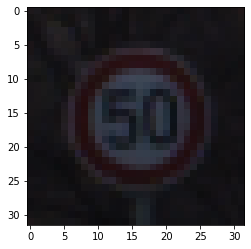

In [ ]:
plt.imshow(test["features"][1012])

In [ ]:
# load lai model sau khi train

In [ ]:
saved_model = tf.keras.models.load_model("Model1.h5")

In [ ]:
result = saved_model.predict(testX[8080:8081])
result

array([[2.35660963e-10, 3.63573260e-09, 9.99990344e-01, 8.12339863e-07,
        2.65837369e-11, 8.74479520e-06, 2.83777268e-09, 2.63502978e-12,
        1.17314052e-07, 7.05251912e-10, 6.93978338e-12, 5.74346723e-13,
        8.42294442e-13, 2.66060576e-11, 5.19219596e-13, 3.46013738e-11,
        2.92039309e-11, 1.05222761e-14, 4.48112034e-13, 2.50500944e-12,
        1.02240556e-10, 1.82592741e-09, 1.40087131e-09, 7.12140000e-11,
        2.92456516e-13, 1.16057421e-10, 5.58771562e-13, 3.79063794e-12,
        1.45969879e-13, 2.01385145e-10, 3.40998036e-13, 2.22779786e-08,
        1.59554071e-11, 6.59503918e-12, 4.82748010e-13, 2.54638133e-11,
        1.70798879e-11, 5.47639538e-11, 9.99072144e-11, 3.05932428e-12,
        2.82674129e-09, 5.36824708e-12, 4.81429653e-12]], dtype=float32)

In [ ]:
final = np.argmax(result)
final= classNames[final]
final

'Speed limit (50km/h)'

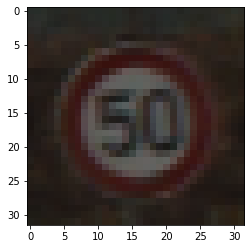

In [ ]:
plt.imshow(test["features"][8080])